# Isomap

**LITERATURA**


1.   A Global Geometric Framework for Nonlinear Dimensionality Reduction, Tenenbaum et al.

2.   Algorithms for manifold learning, Lawrence Cayton

## Algoritam

Jedan od najranijih *manifold learning* algoritama je Isomap. Algoritam se svodi na 3 koraka. Na visokoj (bez detalja) razini, algoritam ima sljedeću strukturu.

**Isomap algoritam**

Input: $x_1,...,x_n\in \mathbb{R}^D$ i $k\in \mathbb{N}$ (broj najbližih susjeda).

1.   Konstruiramo graf k najbližih susjeda: točka $x$ je na grafu povezana (bridom) sa $y$ ako je $y$ među k najbližih susjeda točke $x$, a težina ruba koji ih veže je dana Euklidskom udaljenosti $w_{ij}=\left||x_i-x_j|\right|$
2.   Estimiramo udaljenosti na mnogostrukosti $M$ među točkama inputa tako da pronađemo najkraći put na grafu koji smo konstruirali u koraku 1. Ovo se može npr. Dijkstrinim algoritmom.

3. Koristimo MDS (Multidimensional scaling) da pronađemo točke u nižedimenzionalnom prostoru $\mathbb{R}^d$ čije udaljenosti odgovaraju onima iz koraka 2. Dakle, $f$ koji pokušavamo rekonstruirati je izometrija (čuva udaljenosti između $\mathbb{R}^d$ i $M$) - otud i samo ime algoritma.

Prisjetimo se da je udaljenost između dvije točke na $M$ dana infimumom duljina svih krivulja koje leže na $M$ i vežu te dvije točke. Posljedično, euklidska udaljenost je neprimjerena. Ipak, ako je graf dovoljno gust (dataset dovoljno velik), očekujemo da će udaljenost između dva susjeda na $M$ biti približno jednak njihovoj euklidskoj udaljenosti na $\mathbb{R}^D$, tj. da će udaljenost dalekih točaka biti približno jednaka njihovoj udaljenosti na grafu.


Napomenimo još da je zahtjev da karta mora biti globalna i k tome još i izometrija iznimno restringiran. Nužan i dovoljan uvjet da bi u okolini svake točke postojala karta-izometrija je da Riemannov tenzor iščezava, tj. prostor je ravan (eng. *flat*). Primjerice, cilindar je u ovom smislu ravan (može se ispraviti ravni komad ravnine bez 'gužvanja'), ali sfera nije. Manje restriktivno, možemo tražiti izometričko smještenje u neki $\mathbb{R}^s$ (koje neće biti karta). Onda postoji rezultat Johna Nasha (analogan Whitneyevom) koji garantira da se svaka Riemannova mnogostrukost može smjetiti u $\mathbb{R}^N$ za dovoljno veliki $N$. Zapravo, može se pokazati da je $d(d+1)(3d+11)/2$ gornja međa na dimenziju $N$ - međa je bolja, $d(3d+11)/2$, ako je mnogostrukost kompaktna.

## Dijkstrin algoritam

Zadan je neki graf s vrhovima i bridovima između tih vrhova, koji imaju neke težine. Tražimo najkraću udaljenost od nekog *početnog vrha* grafa do *destinacije* (krajnjeg vrha). *Udaljenost* vrha $y$ je udaljenost od *početnog vrha* do $y$ kroz neku putanju (tj. suma težina svih bridova koji tvore tu putanju). Ideja algoritma je prvo pridodijeliti vrhovima neke početne "*minimalne udaljenosti*", potom ih iterativno pokušati popraviti.

**Dijkstrin algoritam**

**Inicijalizacija**:
> 1.   Sve vrhove označimo **neposjećenima** te oformimo skup svih **neposjećenih vrhova**.
2.   Svakom vrhu dajemo početnu **minimalnu udaljenost** tako da za **početni vrh** stavimo 0, a svaki drugi inicijaliziramo na $\infty$. Stavimo **početni vrh** kao **trenutni vrh**


**Algoritam**:
> 1.   Za dani **trenutni vrh** prolazimo kroz sve njegove **neposjećene susjede** (**neposjećene vrhove** koji su povezani jednim rubom na grafu s **trenutnim vrhom**). Za svakog **neposjećenog susjeda** računamo njegovu udaljenosti kroz sve puteve koji prolaze kroz **trenutni vrh** i odaberemo najmanju. Tu najmanju udaljenost uzmemo kao privremenu **minimalnu udaljenost** tog **neposjećenog vrha**, osim ako već upisana **minimalna udaljenost** nije manja.
2.   Kada smo gotovi sa svim **neposjećenim susjedima** našeg **trenutnog vrha**, **trenutni vrh** označimo kao **posjećenog** i pomaknemo iz skupa svih **neposjećenih vrhova**; na **posjećeni** vrh se više nećemo vratiti.
3.   Kada se **destinacija** označi kao **posjećena**, stani. Ako je najmanja udaljenost svih vrhova u **neposjećenom** skupu $\infty$, također stani. Ovo se može dogoditi npr. ako nema veze (putanje) između **početnog vrha** i preostalih **neposjećenih vrhova** (koji uključuju **destinaciju**). Drugim riječima, ako graf nije povezan, a **destinacija** i **početni vrh** leže na rezličitim komponentama.
4.   Inače, odaberi **neposjećeni vrh** s najmanjom (privremenom) **minimalnom udaljenosti**, označi ga kao **trenutni vrh** i, krenuvši od 1, ponovi postupak.






Valja napomenuti da, ukoliko prvi put računamo udaljenost do neposjećenog susjeda, onda je zapisano $\infty$ pa sigurno unosimo dobivenu udaljenost. Ipak, općenito se može dogoditi da smo u nekom prethodnom koraku zapisali neku udaljenost (ako je taj isti neposjećeni susjed opet susjed nekog prethodno posjećenog vrha) te se može dogoditi da je upisana udaljenost manja od one koju pokušavamo upisati (ako je minimalna udaljenost kroz neku putanju koja ide preko prethodno posjećenog vrha manja od minimalne udaljenosti koja ide preko trenutnog vrha).

## MDS

Dijkstrin algoritam vraća $n\times n$ matricu $D$ (približnih) geodezičkih udaljenosti točaka $x_1,...,x_n\in \mathbb{R}^D$. MDS uzme tu matricu, koja je očito simetrična ($D_{ij}=D_{ji}$), nenegativna ($D_{ij}\geq 0$) i šuplja (eng *hollow* $D_{ii}=0$), potom konstruira skup točaka čije udaljenosti odgovaraju onima iz $\mathbb{R}^D$. Ključan rezultat je sljedeći teorem:

**TEOREM**:

Neka je $J$ matrica jedinica ($J_{ij}=1$), a $I$ jedinična matrica i $H=I-\frac{1}{n}J$. Nenegativna simetrična šuplja $n\times n$ matrica $D$ je matrica euklidskih udaljenosti akko je matrica $G=-\frac{1}{2}HDH$ pozitivno definitna. U tom slučaju je $G$ Gramova matrica za konfiguraciju centriranu u 0, odnosno $G_{ij}=y_i\cdot y_j=y_i^Ty_j$, gdje $\sum_iy_i=0$. Kraće, možemo pisati $G=Y^TY$, gdje je $Y$ matrica čiji su stupci $y_i$.

*DOKAZ*

U sekciji "Dodatak: matrica euklidskih udaljenosti".

$G$ je općenito samo približno pozitivno definitna (jer udaljenosti na grafu samo aproksimiraju geodezičke udaljenosti). Ovaj problem riješimo tako da $G$ projiciramo na prostor pozitivno semidefinitnih matrica. Naime, prvo dijagonaliziramo $G$ (što možemo jer je $G$ simetrična), potom joj stavimo sve negativne svojstvene vrijednosti na $0$.

Neka je $\Lambda$ dijagonalna matrica svojstvenih vrijesnosti od $G$, tj. $G=U^T\Lambda U$ za neku unitarnu matricu $U$. Tražena konfiguracija točaka dana je stupcima matrice $Y$, gdje $G=Y^TY$. Ako je $\Lambda$ pozitivno semidefinitna, onda za $Y$ samo uzmemo $Y=U\Lambda^{1/2}$ (ovdje $\Lambda^{1/2}_{ij}=\sqrt{\Lambda_{ij}}$), inače stavimo $(\Lambda_+)_{ij}=max\{\Lambda_{ij}, 0\}$ i uzmemo $Y=U\Lambda_+^{1/2}$.

$D$ je $n\times n$ matrica ($n$ je veličina dataseta) pa je općenito i $Y$ isto $n\times n$ matrica.  S druge strane, mi želimo smanjiti dimenzionalnost do $d$ (=dimenzija mnogostrukosti), što ćemo postići tako da $Y$ projiciramo na njegovih najvećih $d$ principijelnih komponenti. Ovo je pak ekvivalentno izbacivanju posljednjih $n-d$ stupaca od $Y$, što ćemo sada i pokazati.

Neka je $Y=U\Lambda^{1/2}_+$, onda je $U^T\Lambda_+ U$ spektralna dekompozicija od $Y^TY$. Projiciramo li PCA algoritmom $Y$ na $d$-dim prostor razapet s njegovih prvih $d$ principijalnih komponenti, kao rezultat ćemo dobiti $XV$, gdje je $V$ matrica ($n\times d$) svojstvenih vektora od $Y^TY$. Primijetimo da je $Y^TY$ isto što i (empirijska) matrica kovarijanci (do na nekakav faktor $\frac{1}{n-1}$ ili $\frac{1}{n}$). Ako s $v_1,...,v_d$ označimo prvih $d$ svojstvenih vektora od $Y^TY$, a odgovarajuće svojstvene vrijednosti s $\xi_i$, onda $\xi_iv_i=(U\Lambda_+^{1/2})^T(U\Lambda_+^{1/2})v_i=\Lambda_+^{1/2}U^TU\Lambda_+^{1/2}v_i=\Lambda_+^{1/2}\Lambda_+^{1/2}v_i=\Lambda_+v_i$. Kako je $\Lambda_+$ već dijagonalna, zaključujemo da $v_i$ mora biti vektor standardne baze $e_i$ (nakon normiranja). Stoga, $YV=Y[e_1,...,e_d]=[Y]_{n\times d}$ (=Y projiciran na prvih $d$ stupaca).

**MDS algoritam**

Input: Simetrična $n\times n$ matrica $D$ koja je nenegativna ($D_{ij} \geq 0$) i šuplja ($D_{ii}=0$), $d\in \{1,...,n\}$

1.   Izračunaj $G=-\frac{1}{2}HDH$, $\quad H=I-\frac{1}{n}J$.
2.   Izračunaj spektralnu dekompoziciju $G=U^T\Lambda U$.
3. Uzmi $\Lambda_+$, $\quad (\Lambda_+)_{ij}=max\{\Lambda_{ij}, 0\}$.
4. Uzmi $Y=U\Lambda_+^{1/2}$.
5. Izbaci sve osim prvih $d$ stupaca od $Y$, tj. vrati $[Y]_{ n\times d}$.



Zapravo, MDS može automatski pronaći dimenziju smještenja $d$ jer ako se matrica $D$ može realizirati kao matrica euklidskih udaljenosti u $d$-dim prostoru (tj. ako je $G$ Gramova matrica za $d$-dim skup točaka), onda će samo prvih $d$ stupaca od $Y$ biti različito od $0$, tj. rang od $Y$ je $d$. Dakle, samo sačuvamo stupce koji su $\neq 0$.

## Demonstracija

### PCA - S dataset

Uvodimo novi dataset koji leži na nelinearnoj mnogostrukost (ali ravnoj u smislu iščezavanja Riemannovog tenzora)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_s_curve

X_S, Y_S = make_s_curve(n_samples=2000)

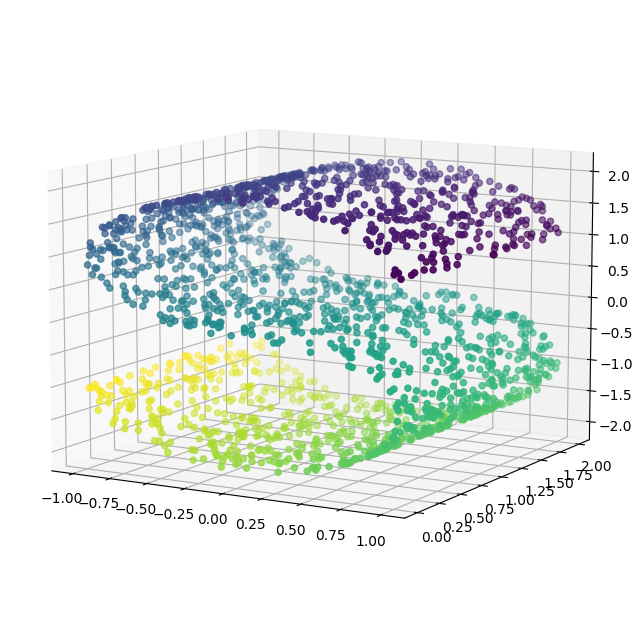

In [3]:
plt.figure(figsize=(12,8)) #nice and big
ax = plt.axes(projection='3d')

ax.scatter3D(X_S[:, 0], X_S[:, 1], X_S[:, 2], c=Y_S)
ax.view_init(10, -60);


Probajmo ovaj problem napasti sa PCA

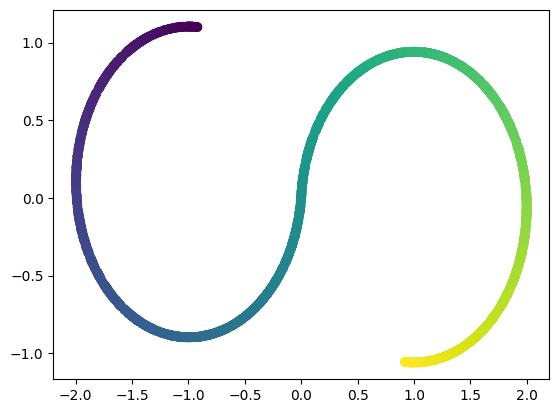

In [4]:
from sklearn.decomposition import PCA

X_S_pca = PCA(n_components=2).fit_transform(X_S)

plt.scatter(X_S_pca[:, 0], X_S_pca[:, 1], c=Y_S);

PCA ovdje čak i može razdvojiti podatke kako treba jer projekcijom na $XZ$ ravninu dobijemo oblik S koji ne remeti strukturu koju želimo sačuvati (bliske točke su ponovno blizu), ali PCA ne može naučiti kartu (tj. ne može odmotati S).

### PCA - swiss roll dataset

Primijenimo sada PCA na jedan drugi dataset

In [5]:
from sklearn.datasets import make_swiss_roll

X_swiss_roll, Y_swiss_roll = make_swiss_roll(n_samples=2000)

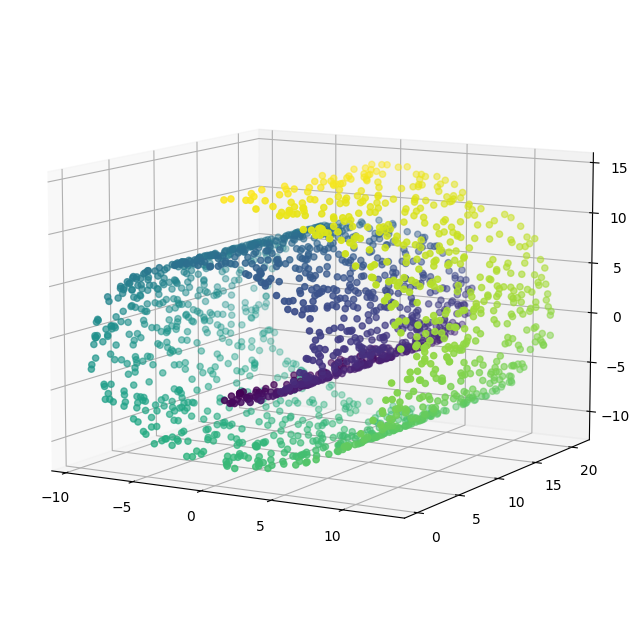

In [6]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter3D(X_swiss_roll[:, 0], X_swiss_roll[:, 1], X_swiss_roll[:, 2], c=Y_swiss_roll)
ax.view_init(10, -60);

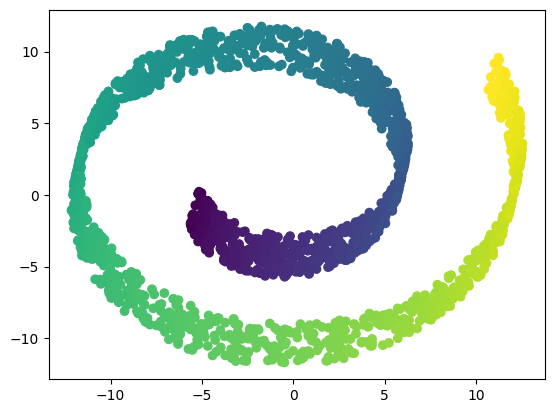

In [7]:
from sklearn.decomposition import PCA

X_swiss_roll_pca = PCA(n_components=2).fit_transform(X_swiss_roll)

plt.scatter(X_swiss_roll_pca[:, 0], X_swiss_roll_pca[:, 1], c=Y_swiss_roll);

Slično kao i prije.

### PCA - sfera

Lagano je konstruirati primjer na kojem PCA potpuno propada - uzmimo npr. sferu (bez polova te s otkidanim segmentom)

In [8]:
from sklearn import manifold
from sklearn.utils import check_random_state

n_neighbors = 10
n_samples = 2000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])
X_sphere=np.array([x, y, z]).T
Y_sphere=p[indices]

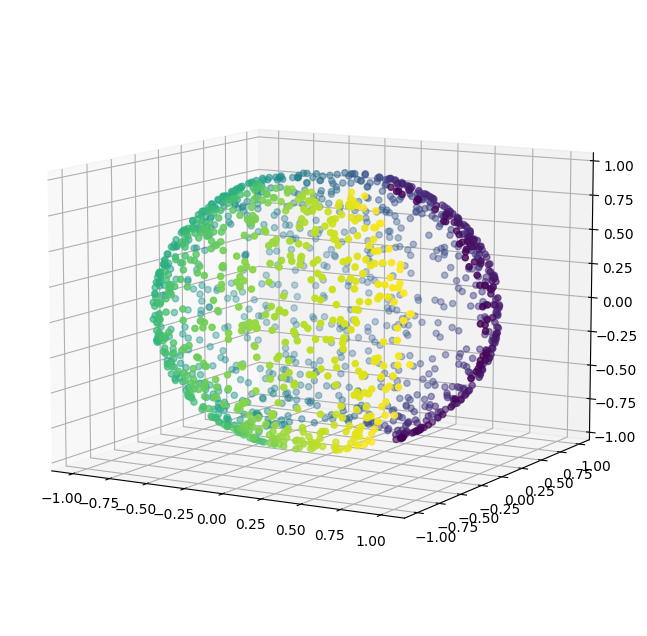

In [9]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter3D(X_sphere[:, 0], X_sphere[:, 1], X_sphere[:, 2], c=Y_sphere)
ax.view_init(10, -60);

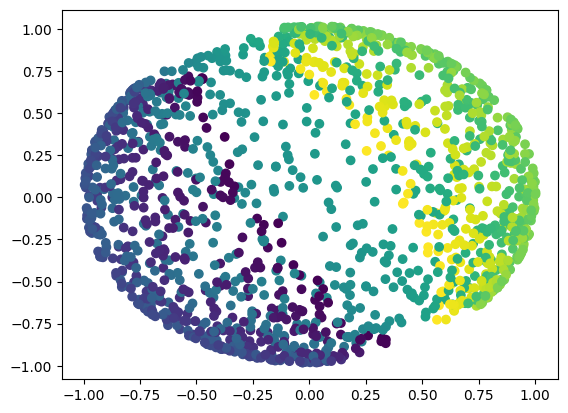

In [10]:
X_sphere_pca = PCA(n_components=2).fit_transform(X_sphere)

plt.scatter(X_sphere_pca[:, 0], X_sphere_pca[:, 1], c=p[indices]);

Dobili smo što smo i očekivali - projekciju sfere na neku ravninu (primijetimo da je ta ravnina postavljena točno gdje je rupa, tj. otkidani segment)



---



### Isomap - S dataset

Primijenimo sada Isomap na prethodna tri dataseta.

S dataset

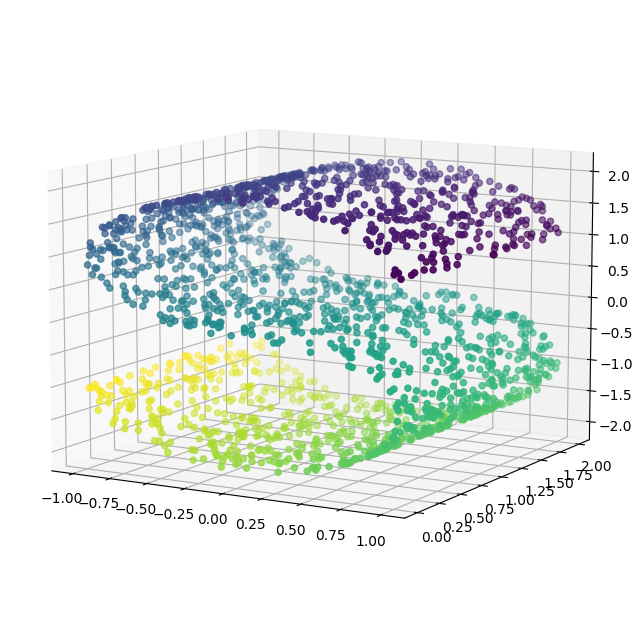

In [11]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter3D(X_S[:, 0], X_S[:, 1], X_S[:, 2], c=Y_S)
ax.view_init(10, -60);

In [12]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=15, n_components=2)
X_S_iso = iso.fit_transform(X_S)

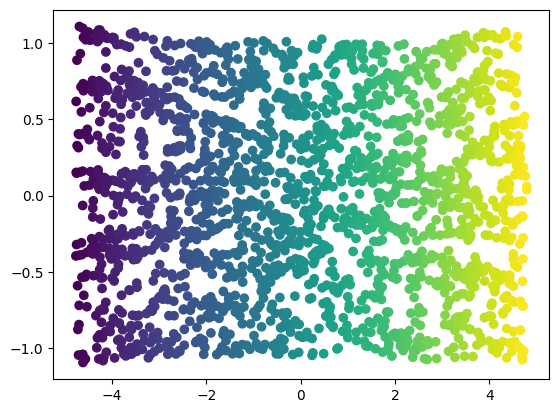

In [13]:
plt.scatter(X_S_iso[:, 0], X_S_iso[:, 1], c=Y_S);

Dakle, (izometrički) smo preslikali početni S dataset u ravninu $\mathbb{R}^2$. Prosto rečeno, "odmotali"/"izravnali" smo ga.

### Isomap - swiss roll dataset

Primijenimo Isomap na swiss roll dataset

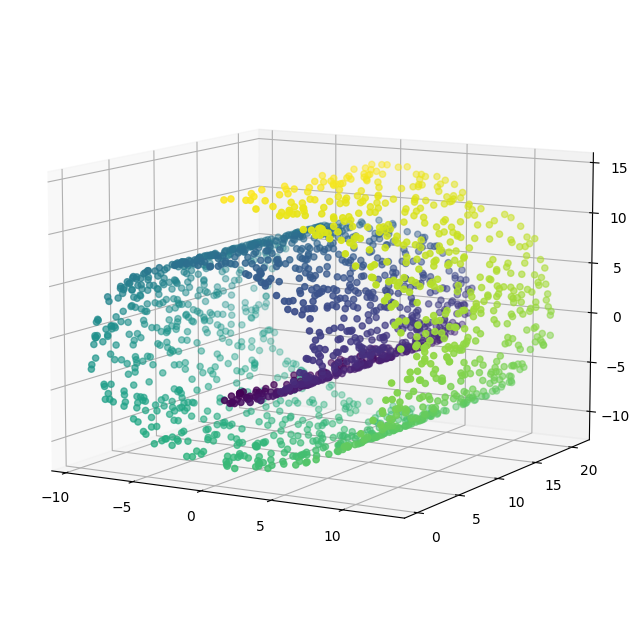

In [14]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter3D(X_swiss_roll[:, 0], X_swiss_roll[:, 1], X_swiss_roll[:, 2], c=Y_swiss_roll)
ax.view_init(10, -60);

In [15]:
iso = manifold.Isomap(n_neighbors=10, n_components=2)
X_swiss_roll_iso = iso.fit_transform(X_swiss_roll)

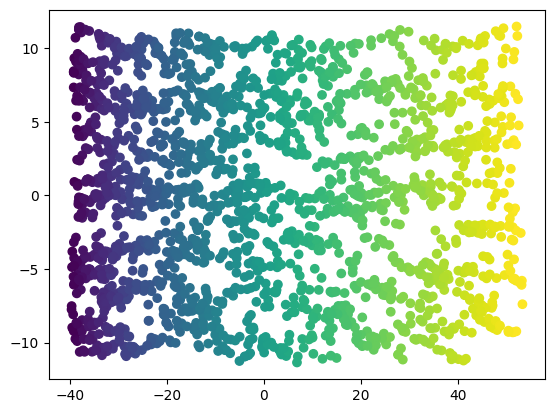

In [16]:
plt.scatter(X_swiss_roll_iso[:, 0], X_swiss_roll_iso[:, 1], c=Y_swiss_roll);

### Isomap - sfera

Sfera - na njoj ne očekujemo izometričko smještenje, ali možda naući neku kartu.

In [17]:
iso = manifold.Isomap(n_neighbors=10, n_components=2)
X_sphere_iso = iso.fit_transform(X_sphere)

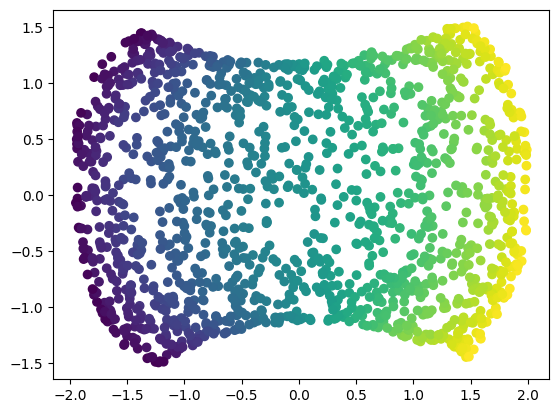

In [18]:
plt.scatter(X_sphere_iso[:, 0], X_sphere_iso[:, 1], c=Y_sphere);

:)

### Isomap - DIGITS dataset

Kao konkretan (manje umjetni) primjer možemo primjeniti Isomap na DIGITS dataset (rukom pisane znamenke).

In [19]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X_digits, Y_digits  = digits.data, digits. target

Definiramo funkciju koja će nam ispisati znamenke

In [20]:
def plot_digits(X, algo=""):
    with plt.style.context(("seaborn", "ggplot")):
        fig = plt.figure(1, figsize=(10, 6))

        colors = ['red','green','orange','blue','purple','cyan','magenta', 'firebrick', 'lawngreen','indigo']
        for digit in range(0,6):
            plt.scatter(X[Y_digits==digit,0],X[Y_digits==digit,1], c = colors[digit], marker="$"+str(digit)+"$",s =50, alpha=0.5)
        plt.xlabel("New Feature 1")
        plt.ylabel("New Feature 2")
        plt.title(algo)
        plt.show()

In [21]:
isomap = manifold.Isomap(n_neighbors=5, n_components=2)
X_digits_iso = isomap.fit_transform(X_digits)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


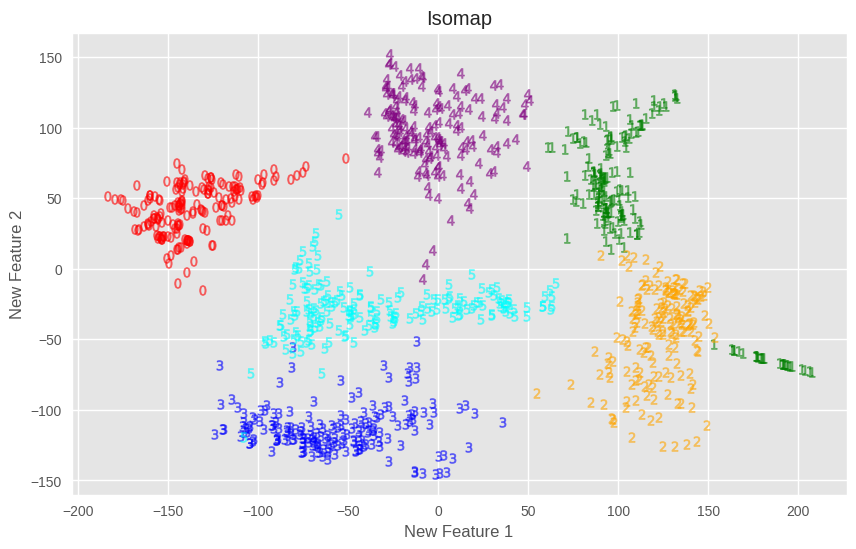

In [22]:
plot_digits(X_digits_iso, "Isomap")

## Dodatak: matrica euklidskih udaljenosti

**TEOREM**

Neka je $M$ $n\times n$ hermitska matrica. Onda vrijedi:

1.   M je pozitivno semidefinitna ($x^*Mx\geq 0$ za sve vektore $x$) akko se $M$ može dekompozirati kao $M=B^*B$. Za realne matrice imamo $M=B^TB$.
2.   M je strogo pozitivno definitna ($x^*Mx > 0$) akko je u dekompoziciji $B$ invertibilna.
3. M je pozitivno semidefinitna s rangom $k\leq n$ akko postoji dekompozicija pomoću $k\times n$ matrice $B$ (ranga $k$). Za svaku dekompoziciju $M=B^*B$ vrijedi $rank(M)=rank(B)$.


*DOKAZ*

Ako je $M=B^*B$, onda je i
$$x^*Mx=(x^*B^*)(Bx)=(Bx)^*(Bx)= \left|| Bx |\right|^2\geq 0$$
pa je $M$ poz. semidefinitna. Štoviše, $B$ je invertibilna akko je jednakost stroga za sve $x\neq 0$ (akko $Bx \neq 0$ za $x \neq 0$), tj. akko je $M$ strogo pozitivno definitna.

Obratno, ako je $M$ poz. semidefinitna (i hermitska), onda $M$ ima spektralnu dekompoziciju $M=U^*\Lambda U$, gdje je $U$ unitarna ($U^*=U^{-1}$), a $\Lambda$ dijagonalna matrica svojstvenih vrijednosti od $M$. Kako je poz. semidefinitna, svojstvene vrijednosti su nenegativne pa možemo uzeti $\Lambda^{1/2}_{ij}=\sqrt{\Lambda_{ij} }$. Sada
$$M=U^*\Lambda U=U^*\Lambda^{1/2}\Lambda^{1/2}U=U^*(\Lambda^{1/2})^*\Lambda^{1/2}U=(\Lambda^{1/2}U)^*(\Lambda^{1/2}U)=B^*B$$
za $B=\Lambda^{1/2}U$.

Ako $M$ ima rang $k$, onda ima točno $k$ (strogo) pozitivnih svojstvenih vrijednosti, a ostale su 0. Dakle, $B=\Lambda^{1/2}U$ ima sve redove 0 osim njih $k$ mnogo pa je ranga $k$.
QED

Gramova matrica je pak definirana izrazom $G_{ij}=g_{ij}=x_i\cdot x_j=x_i^Tx_j$. Na dijagonali imamo $g_{ii}=\left||x_i|\right|^2$, tj. udaljenost $x_i$ od 0. Ako je $X$ matrica koja za stupce ima $x_i$, onda $G=X^TX$. Naime, unosi matrice $A$ u bazi $e_i$ su $a_{ij}=e_i^TAe_j$, stoga
$$e_i^TX^TXe_j=(Xe_i)^T(Xe_j)=x_i^Tx_j=g_{ij}=e_i^TGe_j.$$

Neka su $x_1,...,x_n\in \mathbb{R}^k$. Euklidska matrica udaljenosti $D$ je definirana izrazom
$$
D_{ij}=\left||x_i-x_j|\right|^2=d^2_{ij},
$$
tj.
$$
D=\left( \begin{matrix}
0 & d_{12}^2 & \dots & d^2_{1n} \\
d^2_{21} & 0  & & \vdots \\
\vdots & & \ddots & d^2_{(n-1) n}\\
d^2_{n1} & \dots & d^2_{n (n-1)}& 0
\end{matrix} \right)
$$



Matrica euklidskih udaljenosti i Gramova matrica su povezane na sljedeći način:


*   $d^2_{ij}=\left|x_i-x_j|\right|^2=(x_i-x_j)^T(x_i-x_j)=x_i^Tx_i-2x_i^Tx_j+x_j^Tx_j=g_{ii}-2g_{ij}+g_{jj}$. Dakle, lagano izračunamo $D$ iz $G$.
*   Obratno, $G$ ima dodatnu informaciju o udaljenosti od ishodišta, stoga odaberimo neko ishodište $x_0$ i s $d_{ij}$ označimo matricu udaljenosti između parova točaka $x_0,x_1,...,x_n$. Sjetimo se da polarizacijski identitet kaže
$$\langle u, v \rangle =u^Tv=\left| |u|\right|^2 + \left| |v|\right|^2-\left| |u-v|\right|^2,$$
stoga vidimo da
$$g_{ij}=(x_i-x_0)^T(x_j-x_0)=\frac{1}{2}(\left| |x_i-x_0|\right|^2+\left| |x_j-x_0|\right|^2-\left| |x_i-x_j|\right|^2).$$
Drugim riječima: $$g_{ij}=\frac{1}{2}(d^2_{0i}+d^2_{0j}-d^2_{ij}).$$


**DEFINICIJA**

Kažemo da $n \times n$ matrica $D$ ima $k$-dim realizaciju $x_1,...,x_n\in \mathbb{R}^k$ ako je $D$ matrica euklidskih udaljenosti istih točaka.

Neka je sada $D$ simetrična i šuplja ($D_{ii}=0$) matrica dimenzija  $(n+1)\times (n+1)$ s realnim unosima.

Ako $$G_{ij}=\frac{1}{2}(D_{0i}+D_{0j}-D_{ij}),$$ onda čak i ako $G$ nije Gramova imamo

$$
D_{ij}=G_{ii}-2G_{ij}+G_{jj}
$$
Naime, kako $D_{ii}=0$, imamo $G_{ii}=\frac{1}{2}(D_{0i}+D_{0i})=D_{0i}$.
Stoga,
$$G_{ii}-2G_{ij}+G{jj}=D_{0i}-2(\frac{1}{2}(D_{0i}+D_{0j}-D_{ij}))+D_{0j}=D_{ij}.$$




Iz prethodnog teorema sada odmah slijedi da $D$ ima realizaciju u $\mathbb{R}^k$ akko je $n\times n$ matrica  definirana izrazom $$g_{ij}=\frac{1}{2}(D_{0i}+D_{0j}-D_{ij}), \quad (i,j=1,...,n)$$
pozitivno semidefinitna i ima rang $k$.

Zaista, samo u tom slučaju $G=X^TX$ za neku $k\times n$ matricu pa je $G$ Gramova, a $D$ onda mora biti matrica euklidskih udaljenosti. Obratno, kada imamo realizaciju, onda je $G$ Gramova pa je i poz. semidefinitna te mora imati rang $k$, što je i rang od $X$.



**TEOREM**:

Neka je $J$ matrica jedinica ($J_{ij}=1$), a $I$ jedinična matrica i $H=I-\frac{1}{n}J$. Nenegativna simetrična šuplja $n\times n$ matrica $D$ ima realizaciju u $\mathbb{R}^k$ akko je matrica $G=-\frac{1}{2}HDH$ pozitivno definitna i ranga $k$. U tom slučaju je $G$ Gramova matrica za konfiguraciju centriranu u 0, odnosno $G_{ij}=x_i\cdot x_j=x_i^Tx_j$, gdje $\sum_ix_i=0$.

*DOKAZ*


* Kako $H=I-\frac{1}{n}J$, imamo
$$
G=-\frac{1}{2}HDH=-\frac{1}{2}[(I-\frac{1}{n}J)D(I-\frac{1}{n}J)]=-\frac{1}{2}[D-\frac{1}{n}JD-\frac{1}{n}DJ+\frac{1}{n^2}JDJ],
$$
a kako $J_{ij}=1$:
$$
G_{ij}=-\frac{1}{2}(HDH)_{ij}=-\frac{1}{2}(D_{ij}-\frac{1}{n}\sum_iD_{ij}--\frac{1}{n}\sum_jD_{ij}+\frac{1}{n^2}\sum_{ij}D_{ij}).
$$
Sada oduzimanjem i zbrajanjem lagano vidimo da $G_{ii}+G_{jj}-2G_{ij}=D_{ij}$. Dakle, ako je $G$ poz. semidefinitna i ranga $k$, onda je Gramova ranga $k$ pa je $D$ matrica euklidskih udaljenosti (s realizacijom u $\mathbb{R}^k$).


* Obratno, moramo pokazati da svaku Gramovu matricu $G$ možemo zapisati u obliku $G=-\frac{1}{2}HDH$ te da su u tom slučaju točke $x_1,...,x_n$ centrirane u ishodištu, tj. $\sum_ix_i=0$. Naime, uvijek možemo translatirati točke $x_i$ tako da $\sum_ix_i=0$ bez da mijenjamo matricu $D$ (translacije su izometrije, čuvaju udaljenosti). Kako vrijedi $\langle x_i, x_j \rangle = -\frac{1}{2}(\left||x_i-x_j |\right|^2-\langle x_i, x_i \rangle -\langle x_j, x_j \rangle )$, imamo:
$$
G_{ij}=-\frac{1}{2}(D_{ij}-G_{ii}-G_{jj}).
$$
Također,
$$\sum_iG_{ij}=\sum_i\langle x_i,x_j\rangle=\langle \sum_ix_i, x_j\rangle=\langle 0, x_j \rangle =0$$
Sada iz $D_{ij}=G_{ii}+G_{jj}-2G_{ij}$ imamo:
$$
\sum_iD_{ij}=\sum_iG_{ii}+\sum_iG_{jj}-2\sum_iG_{ij}=\sum_i(G_{ii}+G_{jj}).
$$

Slijedi da:
$$ \frac{1}{n}\sum_iD_{ij}=\frac{1}{n}\sum_i(G_{ii}+G_{jj})
$$
Isto tako i:
$$ \frac{1}{n}\sum_jD_{ij}=\frac{1}{n}\sum_j(G_{ii}+G_{jj}) $$

Dakle:
$$ \frac{1}{n^2}\sum_{ij}D_{ij}=\frac{2}{n}\sum_iG_{ii} $$
Pa iz ovih izraza odmah vidimo da i:
$$
\frac{1}{n^2}\sum_{ij}D_{ij}-\frac{1}{n}\sum_jD_{ij}-\frac{1}{n}\sum_iD_{ij}=-G_{jj}-G_{ii}
$$
Konačno,
$$
G_{ij}=-\frac{1}{2}(D_{ij}-G_{ii}-G_{jj})=-\frac{1}{2}(D_{ij}+\frac{1}{n^2}\sum_{ij}D_{ij}-\frac{1}{n}\sum_jD_{ij}-\frac{1}{n}\sum_iD_{ij})=-\frac{1}{2}HDH.
$$
QED